In [1]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_curve,confusion_matrix, auc,roc_curve
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date, time
from functools import reduce
import catboost
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('mode.chained_assignment',  None)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',10)

In [2]:
def CF_user_final(merge_df, num):

    #mean_df = np.mean(merge_df)
    merge_df2 = merge_df.drop(['Key','cutoff'],axis=1).fillna(0.0001)
    user = merge_df2[merge_df2.index == num] #타겟 사용자################
    other_users = merge_df2[merge_df2.index != num] #타겟 외 사용자
    
    from sklearn.metrics.pairwise import cosine_similarity
    similarities = cosine_similarity(user,other_users)[0].tolist() 
    #유사도 행렬, 한 줄
    
    other_users_list = other_users.index.tolist()
    user_similarity = dict(zip(other_users_list, similarities))
    
    import operator # 정렬
    user_similarity_sorted = sorted(user_similarity.items(), key=operator.itemgetter(1))
    user_similarity_sorted.reverse()
    
    top_users_similarities = user_similarity_sorted[:20]
    users = [i[0] for i in top_users_similarities]
    
    similar_users = merge_df2[merge_df2.index.isin(users)] #유사한 사용자들의 값
    ###

    
    similar_users = similar_users.mean(axis=0) #평균
    similar_users_df = pd.DataFrame(similar_users, columns=['user_similarity'])
    
    user_df = merge_df[merge_df.index == num]
    user_df_transposed = user_df.transpose()
    user_df_transposed.columns = ['target']
    user_df_transposed = user_df_transposed[user_df_transposed['target'].isna()==True]
    nan_list = user_df_transposed.index.tolist()
    
    similar_users_df_fill = similar_users_df[similar_users_df.index.isin(nan_list)]
    similar_users_df_fill = similar_users_df_fill.transpose()
    
    for c in nan_list:
        if c in similar_users.index.tolist():
            merge_df[c][num] = similar_users_df_fill[c]
        
    return merge_df
    

In [3]:
def CF_user(merge_df, num):
    #mean_df = np.mean(merge_df)
    merge_df2 = merge_df.drop(['Key','cutoff'],axis=1).fillna(0)
    #out_df2 = out_df.drop(['Key','cutoff'],axis=1).fillna(0.0001)
    user = merge_df2[merge_df2.index == num] #타겟 사용자################
    other_users = merge_df2[merge_df2.index != num] #타겟 외 사용자
    
    from sklearn.metrics.pairwise import cosine_similarity
    similarities = cosine_similarity(user,other_users)[0].tolist() 
    #유사도 행렬, 한 줄
    
    other_users_list = other_users.index.tolist()
    user_similarity = dict(zip(other_users_list, similarities))
    
    import operator # 정렬
    user_similarity_sorted = sorted(user_similarity.items(), key=operator.itemgetter(1))
    user_similarity_sorted.reverse()
    
    top_users_similarities = user_similarity_sorted[:20]
    users = [i[0] for i in top_users_similarities]
    
    similar_users = merge_df[merge_df.index.isin(users)] #유사한 사용자들의 값
    ###
    drop_col = ['cutoff','Key']
    for col in similar_users.columns:
        nan_num = 0
        for i in range(len(similar_users)):
            nan_similar_users = similar_users[col].isna()
            if nan_similar_users.values[i] == True:
                nan_num += 1
            if nan_num > 13: # 결측치가 많은 경우 imputaion 하지 않음음
                drop_col.append(col)
        print(col,nan_num)
    drop_col = set(drop_col)
    
    similar_users=similar_users.drop(drop_col,axis=1)
    similar_users = similar_users.mean(axis=0) #평균
    similar_users_df = pd.DataFrame(similar_users, columns=['user_similarity'])
    
    user_df = merge_df[merge_df.index == num]
    user_df_transposed = user_df.transpose()
    user_df_transposed.columns = ['target']
    user_df_transposed = user_df_transposed[user_df_transposed['target'].isna()==True]
    nan_list = user_df_transposed.index.tolist()
    
    similar_users_df_fill = similar_users_df[similar_users_df.index.isin(nan_list)]
    similar_users_df_fill = similar_users_df_fill.transpose()
    
    for c in nan_list:
        if c in similar_users.index.tolist():
            merge_df[c][num] = similar_users_df_fill[c]
        
    return merge_df
    

In [4]:
merge_df = pd.read_csv('merge_df.csv')

In [5]:
for i in range(len(merge_df)):
    merge_df = CF_user(merge_df,i)
for i in range(len(merge_df)):
    merge_df = CF_user(merge_df,i)

소요시간 0
RT_A3 0
RT_A4 0
RT_A5 0
RT_A8 0
RT_A10 0
소요시간.1 0
RT_B1 0
RT_B2 0
RT_B3 0
RT_B5 0
RT_B9 0
RT_A_median 0
RT_A_sd 0
RT_A_min 0
RT_A_max 0
RT_B_sum 0
RT_B_median 0
RT_B_sd 0
RT_B_min 0
RT_B_max 0
정답수.2 0
cal10.1 0
RT_cal1 0
RT_cal2 0
RT_cal3 0
RT_cal4 0
RT_cal6 0
RT_cal7 0
RT_cal8 0
RT_cal9 0
RT_cal10 0
RT_cal12 0
RT_cal_sum 0
RT_cal_median 0
소요시간.2 0
정답수.3 0
RT_sa1 0
RT_sa2 0
RT_sa3 0
RT_sa4 0
RT_sa5 0
RT_sa6 0
RT_sa_sum 0
RT_sa_mean 0
RT_sa_sd 0
RT_sa_min 0
RT_sa_max 0
소요시간.5 0
소요시간.6 0
소요시간.7 0
PD1.Phonation:sum 0
PD1.Phonation:mean 0
PD1.Phonation:median 0
PD1.Phonation:std 0
PD1.Phonation:min 0
PD1.Phonation:max 0
PD1.Pause:sum 1
PD1.Pause:median 1
PD1.Pause:min 1
PD1.Pause:max 1
PD1.Pause:total 0
PD1.Pause:rate 0
PD1.CIU:rate 0
PD1.Keyword:count 0
PD1.Keyword:rate 0
PD2.Phonation:sum 0
PD2.Phonation:max 0
PD2.Pause:sum 11
PD2.Pause:mean 11
PD2.Pause:median 11
PD2.Pause:max 11
PD2.Pause:rate 0
PD2.CIU:rate 0
PD3.Phonation:sum 0
PD3.Phonation:mean 0
PD3.Phonation:median 0
PD3.P

In [6]:
merge_df.isnull().sum()

소요시간                         0
RT_A3                        0
RT_A4                        0
RT_A5                        0
RT_A8                        0
                            ..
AntiSaccade5.Velocity:std    0
AntiSaccade5.Velocity:min    0
AntiSaccade5.Velocity:max    0
Key                          0
cutoff                       0
Length: 252, dtype: int64

In [7]:
for i in range(len(merge_df)):
    merge_df = CF_user_final(merge_df,i)

In [8]:
pd.set_option('display.max_rows',None)
merge_df.isnull().sum()

소요시간                            0
RT_A3                           0
RT_A4                           0
RT_A5                           0
RT_A8                           0
RT_A10                          0
소요시간.1                          0
RT_B1                           0
RT_B2                           0
RT_B3                           0
RT_B5                           0
RT_B9                           0
RT_A_median                     0
RT_A_sd                         0
RT_A_min                        0
RT_A_max                        0
RT_B_sum                        0
RT_B_median                     0
RT_B_sd                         0
RT_B_min                        0
RT_B_max                        0
정답수.2                           0
cal10.1                         0
RT_cal1                         0
RT_cal2                         0
RT_cal3                         0
RT_cal4                         0
RT_cal6                         0
RT_cal7                         0
RT_cal8       

In [9]:
merge_df.shape

(289, 252)

In [10]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
seed = 7
skfold = RepeatedStratifiedKFold(n_splits=5,random_state=seed,n_repeats=4)

proba_score = []
predict_score = []
acc_score = []
re_score = []
prauc_score = []
specifi_score = []
cm1_score = []

curve_fprs = []
curve_tprs = []
curve_thresholds = []

curve_pre = []
curve_rec = []
curve_thr = []

tprs_ls = []
mean_fpr = np.linspace(0,1,100)

x_df = merge_df.drop(['Key','cutoff'],axis=1)
y_df = merge_df['cutoff']

sc = StandardScaler()
x_df = pd.DataFrame(sc.fit_transform(x_df), columns=x_df.columns)


for j, (train_idx, val_idx) in enumerate(skfold.split(x_df,y_df)):

    x_train, y_train = x_df.iloc[train_idx], y_df.iloc[train_idx]
    x_test, y_test = x_df.iloc[val_idx], y_df.iloc[val_idx]

    x_train_sk, x_val_sk, y_train_sk, y_val_sk = train_test_split(x_train,y_train,stratify=y_train, random_state=seed, test_size=0.2)

       
    smote = SMOTE(random_state=42)###
    x_train_sk, y_train_sk = smote.fit_resample(x_train_sk, y_train_sk)
    print(' 변화된 값의 분포 :\n',pd.Series(y_train_sk).value_counts() )
    
    model = catboost.CatBoostClassifier(
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    verbose=False,
                                    random_state=seed
                                    )
    D_train = catboost.Pool(x_train_sk, y_train_sk)
    D_test = catboost.Pool(x_val_sk, y_val_sk)

    model.fit(D_train, eval_set=D_test, verbose=False)

    ft_importance_values = model.feature_importances_

    pred = model.predict_proba(x_test)[:,1]
    fprs, tprs, thresholds = roc_curve(y_test, pred)

    tprs_ls.append(np.interp(mean_fpr, fprs, tprs))

    curve_tprs.append(tprs)
    curve_fprs.append(fprs)
    curve_thresholds.append(thresholds)

    J = tprs - fprs
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    precision, recall, th = precision_recall_curve(y_test, pred)
    prauc = auc(recall, precision)

    curve_pre.append(precision)
    curve_rec.append(recall)
    curve_thr.append(th)
        
    cm1 = confusion_matrix(y_test, np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0))

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    print('Youden index threshold : ',best_thresh)

    print('roc_auc_score : ',roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    print('acc : ',accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    print('sensitivity : ',Sensitivity)
    print('specificity : ',Specificity)
    print('pr_auc : ',prauc,'\n')
    print(cm1)

    proba_score.append(roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    acc_score.append(accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    re_score.append(Sensitivity)
    specifi_score.append(Specificity)
    prauc_score.append(prauc)
    cm1_score.append(cm1)

 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
Youden index threshold :  0.23061944186852426
roc_auc_score :  0.7229166666666667
acc :  0.6896551724137931
sensitivity :  0.8
specificity :  0.6666666666666666
pr_auc :  0.4108762773884257 

[[32 16]
 [ 2  8]]
 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
Youden index threshold :  0.46846011361344186
roc_auc_score :  0.7854166666666667
acc :  0.6206896551724138
sensitivity :  1.0
specificity :  0.5416666666666666
pr_auc :  0.4532604881677462 

[[26 22]
 [ 0 10]]
 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
Youden index threshold :  0.47759044085035
roc_auc_score :  0.6979166666666666
acc :  0.7931034482758621
sensitivity :  0.7
specificity :  0.8125
pr_auc :  0.4450519443246781 

[[39  9]
 [ 3  7]]
 변화된 값의 분포 :
 0    153
1    153
Name: cutoff, dtype: int64
Youden index threshold :  0.22338022692713008
roc_auc_score :  0.7097505668934241
acc :  0.7586206896551724
sensitivity :  0.7777777777777778
spec

In [11]:
print('proba_score',np.mean(proba_score))
print('re_score',np.mean(re_score))
print('specifi_score',np.mean(specifi_score))
proba_score

proba_score 0.7205666572184429
re_score 0.7372222222222223
specifi_score 0.7240858843537413


[0.7229166666666667,
 0.7854166666666667,
 0.6979166666666666,
 0.7097505668934241,
 0.6597222222222222,
 0.6229166666666667,
 0.7375,
 0.6520833333333333,
 0.7505668934240363,
 0.8194444444444444,
 0.79375,
 0.5625,
 0.7333333333333334,
 0.6439909297052154,
 0.7430555555555556,
 0.7104166666666667,
 0.825,
 0.6583333333333333,
 0.6961451247165533,
 0.8865740740740741]

In [12]:
TN_ls = []
FP_ls = []
FN_ls = []
TP_ls = []

for i in range(20):
    TN_ls.append(cm1_score[i][0][0]) # TN
    FP_ls.append(cm1_score[i][0][1]) # FP
    FN_ls.append(cm1_score[i][1][0]) # FN
    TP_ls.append(cm1_score[i][1][1]) # TP

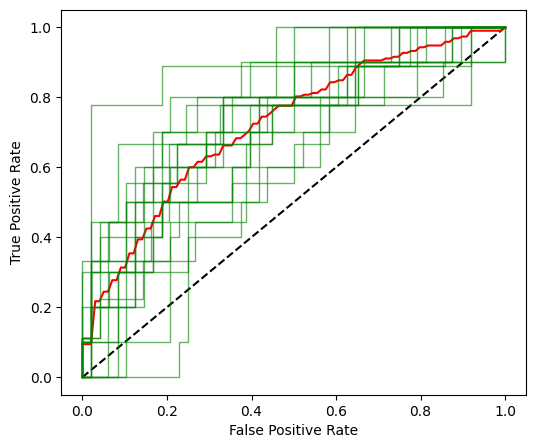

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

mean_tpr = np.mean(tprs_ls, axis=0)
plt.plot(mean_fpr, mean_tpr, color='red')

for i,j in zip(curve_fprs, curve_tprs):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.6, label=None)

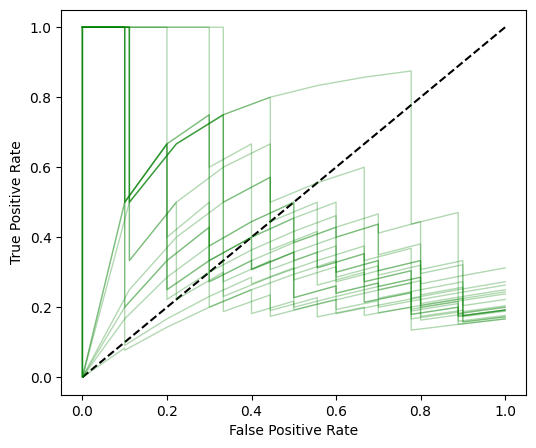

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for i,j in zip(curve_rec, curve_pre):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.3, label=None)

# 1010

In [10]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
seed = 7
skfold = RepeatedStratifiedKFold(n_splits=10,random_state=seed,n_repeats=10)

proba_score = []
predict_score = []
acc_score = []
re_score = []
prauc_score = []
specifi_score = []
cm1_score = []

curve_fprs = []
curve_tprs = []
curve_thresholds = []

curve_pre = []
curve_rec = []
curve_thr = []

tprs_ls = []
mean_fpr = np.linspace(0,1,100)

x_df = merge_df.drop(['Key','cutoff'],axis=1)
y_df = merge_df['cutoff']

sc = StandardScaler()
x_df = pd.DataFrame(sc.fit_transform(x_df), columns=x_df.columns)

ser_dict = {}
for s in x_df.columns:
    ser_dict[s] = 0

for j, (train_idx, val_idx) in enumerate(skfold.split(x_df,y_df)):

    x_train, y_train = x_df.iloc[train_idx], y_df.iloc[train_idx]
    x_test, y_test = x_df.iloc[val_idx], y_df.iloc[val_idx]

    x_train_sk, x_val_sk, y_train_sk, y_val_sk = train_test_split(x_train,y_train,stratify=y_train, random_state=seed, test_size=0.2)

       
    smote = SMOTE(random_state=42)###
    x_train_sk, y_train_sk = smote.fit_resample(x_train_sk, y_train_sk)
    print(' 변화된 값의 분포 :\n',pd.Series(y_train_sk).value_counts() )
    
    model = catboost.CatBoostClassifier(
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    verbose=False,
                                    random_state=seed
                                    )
    D_train = catboost.Pool(x_train_sk, y_train_sk)
    D_test = catboost.Pool(x_val_sk, y_val_sk)

    model.fit(D_train, eval_set=D_test, verbose=False)

    ft_importance_values = model.feature_importances_

    pred = model.predict_proba(x_test)[:,1]
    fprs, tprs, thresholds = roc_curve(y_test, pred)

    tprs_ls.append(np.interp(mean_fpr, fprs, tprs))

    curve_tprs.append(tprs)
    curve_fprs.append(fprs)
    curve_thresholds.append(thresholds)

    J = tprs - fprs
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    precision, recall, th = precision_recall_curve(y_test, pred)
    prauc = auc(recall, precision)

    curve_pre.append(precision)
    curve_rec.append(recall)
    curve_thr.append(th)
        
    cm1 = confusion_matrix(y_test, np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0))

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    print('Youden index threshold : ',best_thresh)

    print('roc_auc_score : ',roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    print('acc : ',accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    print('sensitivity : ',Sensitivity)
    print('specificity : ',Specificity)
    print('pr_auc : ',prauc,'\n')
    print(cm1)

    proba_score.append(roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    acc_score.append(accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    re_score.append(Sensitivity)
    specifi_score.append(Specificity)
    prauc_score.append(prauc)
    cm1_score.append(cm1)

 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
Youden index threshold :  0.18938093794042052
roc_auc_score :  0.8583333333333334
acc :  0.9655172413793104
sensitivity :  0.8
specificity :  1.0
pr_auc :  0.8417748917748917 

[[24  0]
 [ 1  4]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
Youden index threshold :  0.06590950619117256
roc_auc_score :  0.7916666666666667
acc :  0.6896551724137931
sensitivity :  1.0
specificity :  0.625
pr_auc :  0.5744749694749696 

[[15  9]
 [ 0  5]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
Youden index threshold :  0.3602820275077275
roc_auc_score :  0.9416666666666667
acc :  0.896551724137931
sensitivity :  1.0
specificity :  0.875
pr_auc :  0.7563095238095239 

[[21  3]
 [ 0  5]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
Youden index threshold :  0.293254617131434
roc_auc_score :  0.9333333333333333
acc :  0.9310344827586207
sensitivity :  1.0
specificity :  0.9166666666666666
pr_auc :  0.541

In [11]:
print('proba_score',np.mean(proba_score))
print('re_score',np.mean(re_score))
print('specifi_score',np.mean(specifi_score))
proba_score

proba_score 0.7037958333333333
re_score 0.7625
specifi_score 0.7345166666666665


[0.8583333333333334,
 0.7916666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.4916666666666667,
 0.7416666666666667,
 0.55,
 0.77,
 0.53125,
 0.48333333333333334,
 0.75,
 0.8416666666666667,
 0.7750000000000001,
 0.7666666666666667,
 0.7000000000000001,
 0.7541666666666668,
 0.525,
 0.79,
 0.8124999999999999,
 0.75,
 0.7000000000000001,
 0.7583333333333334,
 0.6583333333333334,
 0.625,
 0.6583333333333333,
 0.7833333333333334,
 0.625,
 0.64,
 0.6875,
 0.775,
 0.625,
 0.6833333333333333,
 0.8916666666666666,
 0.8083333333333333,
 0.6583333333333333,
 0.625,
 0.65,
 0.8099999999999999,
 0.8229166666666666,
 0.5250000000000001,
 0.75,
 0.7583333333333333,
 0.725,
 0.7166666666666666,
 0.9083333333333332,
 0.55,
 0.6166666666666667,
 0.76,
 0.5104166666666667,
 0.5916666666666667,
 0.4583333333333333,
 0.7916666666666666,
 0.7083333333333334,
 0.7250000000000001,
 0.8416666666666667,
 0.5666666666666667,
 0.9083333333333332,
 0.97,
 0.7500000000000001,
 0.9249

In [12]:
CF_item = pd.DataFrame()
CF_item['proba_score'] = proba_score
CF_item['re_score'] = re_score
CF_item['specifi_score'] = specifi_score 
CF_item.to_csv('user_CF_SMOTE_1010.csv',index=False)